In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [210]:
df=pd.read_csv("credit_card_default_train.csv")
test=pd.read_csv("credit_card_default_test.csv")
test1=pd.read_csv("credit_card_default_test.csv")

In [211]:
test.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500K,M,Other,Single,31-45,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200K,F,Other,Single,31-45,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400K,M,Other,Other,Less than 30,-1,-1,2,0,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1.5M,M,Graduate,Single,31-45,1,-1,-1,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100K,F,High School,Other,Less than 30,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [212]:
df=df.drop('Client_ID',axis=1)
client_id=test['Client_ID']
test=test.drop('Client_ID',axis=1)

labeldata=df.select_dtypes(include=[object,bool])
labeldata_test=test.select_dtypes(include=[object,bool])

In [213]:
from sklearn import preprocessing

In [214]:
labelEncoder=preprocessing.LabelEncoder()
X_2=labeldata.apply(labelEncoder.fit_transform)
X_2_test=labeldata_test.apply(labelEncoder.fit_transform)

X_2.head()


,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE
0,3,1,0,0,0
1,3,0,1,0,2
2,2,0,1,1,0
3,5,0,0,1,0
4,3,0,0,0,0


In [215]:
categorical=['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE']

In [216]:
df['Balance_Limit_V1']=X_2.Balance_Limit_V1
df['Gender']=X_2.Gender
df['EDUCATION_STATUS']=X_2.EDUCATION_STATUS
df['MARITAL_STATUS']=X_2.MARITAL_STATUS
df['AGE']=X_2.AGE

In [217]:
df['DUE_AMT']=(df['DUE_AMT_JULY']+df['DUE_AMT_AUG']+df['DUE_AMT_SEP']+df['DUE_AMT_OCT']+
       df['DUE_AMT_NOV']+ df['DUE_AMT_DEC'])/6

df=df.drop(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC'],axis=1)

# test['DUE_AMT']=(test['DUE_AMT_JULY']+test['DUE_AMT_AUG']+test['DUE_AMT_SEP']+test['DUE_AMT_OCT']+
#        test['DUE_AMT_NOV']+ test['DUE_AMT_DEC'])/6

# test=test.drop(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
#        'DUE_AMT_NOV', 'DUE_AMT_DEC'],axis=1)

In [218]:
test['Balance_Limit_V1']=X_2_test.Balance_Limit_V1
test['Gender']=X_2_test.Gender
test['EDUCATION_STATUS']=X_2_test.EDUCATION_STATUS
test['MARITAL_STATUS']=X_2_test.MARITAL_STATUS
test['AGE']=X_2_test.AGE

In [219]:
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,DUE_AMT
0,3,1,0,0,0,-1,-1,-1,-1,-1,-1,3437,6004,39418,162772,0,538165,0,33474.833333
1,3,0,1,0,2,0,-1,-1,-1,-1,0,151818,46200,43530,80811,942,33666,0,130174.666667
2,2,0,1,1,0,4,3,2,2,-2,-2,0,0,0,0,0,0,1,8040.000000
3,5,0,0,1,0,2,0,0,0,0,0,3855,3890,3696,4620,4049,3918,1,96483.333333
4,3,0,0,0,0,2,2,0,0,0,0,0,20790,16170,17325,16401,17325,0,435555.166667


In [220]:
Y=df['NEXT_MONTH_DEFAULT']
X=df.drop('NEXT_MONTH_DEFAULT',axis=1)

In [226]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)

Using TensorFlow backend.


In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=400,max_features='auto',random_state=0,
                          max_depth=14)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_train_pred = clf.predict(x_train)

In [207]:
# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(n_estimators=400,max_features='auto',random_state=0,
#                           max_depth=10)
# clf.fit(X,Y)

# y_pred=clf.predict(test)

In [139]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [208]:
# di_ct={'Client_ID':test1.Client_ID,'NEXT_MONTH_DEFAULT':y_pred}

# testdf=pd.DataFrame(di_ct)
# testdf.to_csv('file2.csv', header=True, index=False) 

In [229]:
from sklearn import metrics

print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred))

train accuracy=  0.8101231922870916
test accuracy=  0.7805302624531334


In [224]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3745
           1       0.71      0.37      0.49      1055

    accuracy                           0.83      4800
   macro avg       0.78      0.66      0.69      4800
weighted avg       0.81      0.83      0.81      4800



In [47]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10)

print(all_accuracies)

[0.821875   0.8171875  0.81822917 0.81875    0.82291667 0.8
 0.82135417 0.8140625  0.815625   0.81666667]


In [48]:
print(all_accuracies.mean())

0.8166666666666668


In [16]:
grid_param = {
    'n_estimators': [300,500,700,900],
    'criterion': ['gini','entropy'],
    'bootstrap': [True, False],
    'max_depth':[10,12,13]
}

In [17]:
from sklearn.model_selection import GridSearchCV
gd_sr1 = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [41]:
# gd_sr1.fit(x_train, y_train)

In [44]:
a=['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']
feature_imp = pd.Series(clf.feature_importances_,index=a).sort_values(ascending=False)
feature_imp

PAY_JULY            0.239189
PAY_AUG             0.105056
PAY_SEP             0.057613
PAY_OCT             0.049525
PAID_AMT_JULY       0.044559
PAY_NOV             0.043959
DUE_AMT_JULY        0.043509
PAID_AMT_AUG        0.038437
PAY_DEC             0.037297
DUE_AMT_AUG         0.036399
DUE_AMT_SEP         0.034532
PAID_AMT_SEP        0.033920
DUE_AMT_OCT         0.033884
DUE_AMT_NOV         0.033005
DUE_AMT_DEC         0.032933
PAID_AMT_OCT        0.031773
PAID_AMT_NOV        0.031271
PAID_AMT_DEC        0.030603
Balance_Limit_V1    0.015975
AGE                 0.008402
EDUCATION_STATUS    0.008045
Gender              0.005248
MARITAL_STATUS      0.004866
dtype: float64

No handles with labels found to put in legend.


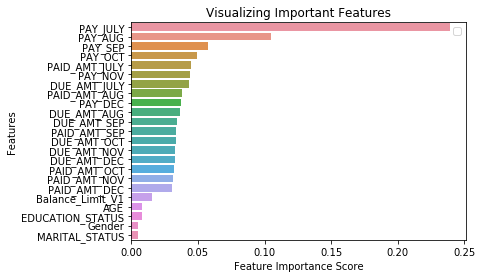

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()